## Objective: Predict pricing of a listing based on attributes
- Which attributes are most important?
- How much additional income could be generated by enhancing an attribute?

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Load data

Data pulled from insideairbnb.com for Portland, OR on 1/20/2024.

In [2]:
pdx = pd.read_csv('listings.csv.gz')

#### Explore Data

In [3]:
pdx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4945 non-null   int64  
 1   listing_url                                   4945 non-null   object 
 2   scrape_id                                     4945 non-null   int64  
 3   last_scraped                                  4945 non-null   object 
 4   source                                        4945 non-null   object 
 5   name                                          4945 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         3734 non-null   object 
 8   picture_url                                   4945 non-null   object 
 9   host_id                                       4945 non-null   i

In [4]:
pdx.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,763278557466324285,https://www.airbnb.com/rooms/763278557466324285,20231220035904,2023-12-20,city scrape,Home in Portland · ★4.92 · 1 bedroom · 1 bed ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5386496,...,5.00,4.92,4.83,City registration pending,f,1,1,0,0,2.68
1,54342436,https://www.airbnb.com/rooms/54342436,20231220035904,2023-12-20,previous scrape,Home in Portland · ★5.0 · 2 bedrooms · 2 beds ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,205079895,...,4.97,4.96,4.90,City registration pending,f,11,11,0,0,3.06
2,51554340,https://www.airbnb.com/rooms/51554340,20231220035904,2023-12-20,city scrape,Guest suite in Portland · ★4.81 · Studio · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/a5b8bd79-25cd...,95479282,...,4.85,4.63,4.93,2018-245298-000-00-HO,f,1,1,0,0,1.06
3,39727402,https://www.airbnb.com/rooms/39727402,20231220035904,2023-12-20,previous scrape,Home in Portland · 2 bedrooms · 1 bed · 3.5 sh...,NaN,NaN,https://a0.muscache.com/pictures/04c2485d-31cb...,85532744,...,1.00,1.00,1.00,NaN,f,1,0,1,0,0.03
4,691287608005268426,https://www.airbnb.com/rooms/691287608005268426,20231220035904,2023-12-20,previous scrape,Tiny home in Portland · 1 bedroom · 1 bed · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,139193165,...,NaN,NaN,NaN,City registration pending,f,1,1,0,0,NaN


In [5]:
pdx.shape

(4945, 75)

#### Null Values?

Columns of Interest w no nulls (so far):<br>
id <br>
name<br>
host_id
<br>host_name
<br>host_since
<br>host_listings_count
<br>host_total_listings_count
<br>host_verifications
<br>host_has_profile_pic
<br>host_identity_verified
<br>neighbourhood_cleansed
<br>property_type
<br>room_type
<br>accommodates
<br>bathrooms_text
<br>amenities
<br>minimum_nights
<br>maximum_nights
<br>availability_30
<br>availability_60
<br>availability_90
<br>availability_365
<br>number_of_reviews
<br>number_of_reviews_ltm
<br>number_of_reviews_l30d
<br>instant_bookable

Columns of interest with nulls:
<br>host_response_time
<br>host_response_rate
<br>host_acceptance_rate
<br>host_is_superhost
<br>beds
<br><strong>price (target column)</strong>
<br>has_availability
<br>first_review
<br>last_review
<br>review_scores_rating
<br>review_scores_accuracy
<br>review_scores_cleanliness
<br>review_scores_checkin
<br>review_scores_communication
<br>review_scores_location
<br>review_scores_value
<br>reviews_per_month

#### Explore attributes/categories

In [6]:
pdx.select_dtypes(include='object')

,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/763278557466324285,2023-12-20,city scrape,Home in Portland · ★4.92 · 1 bedroom · 1 bed ·...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/5386496,I-Hua,2013-03-09,"Portland, OR",...,Entire home/apt,1 bath,[],$110.00,t,2023-12-20,2023-08-20,2023-12-12,City registration pending,f
1,https://www.airbnb.com/rooms/54342436,2023-12-20,previous scrape,Home in Portland · ★5.0 · 2 bedrooms · 2 beds ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/205079895,Mike,2018-07-25,"Portland, OR",...,Entire home/apt,1 bath,[],NaN,NaN,2023-12-20,2022-01-23,2023-06-13,City registration pending,f
2,https://www.airbnb.com/rooms/51554340,2023-12-20,city scrape,Guest suite in Portland · ★4.81 · Studio · 1 b...,NaN,https://a0.muscache.com/pictures/a5b8bd79-25cd...,https://www.airbnb.com/users/show/95479282,Brandon,2016-09-16,"Portland, OR",...,Entire home/apt,1 bath,[],$75.00,t,2023-12-20,2021-11-19,2023-11-10,2018-245298-000-00-HO,f
3,https://www.airbnb.com/rooms/39727402,2023-12-20,previous scrape,Home in Portland · 2 bedrooms · 1 bed · 3.5 sh...,NaN,https://a0.muscache.com/pictures/04c2485d-31cb...,https://www.airbnb.com/users/show/85532744,Chris,2016-07-23,"Worcester, MA",...,Private room,3.5 shared baths,[],$45.00,t,2023-12-20,2021-06-30,2021-06-30,NaN,f
4,https://www.airbnb.com/rooms/691287608005268426,2023-12-20,previous scrape,Tiny home in Portland · 1 bedroom · 1 bed · 1 ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/139193165,Will,2017-07-08,"Portland, OR",...,Entire home/apt,1 bath,[],NaN,NaN,2023-12-20,NaN,NaN,City registration pending,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,https://www.airbnb.com/rooms/645226963346459417,2023-12-20,previous scrape,Rental unit in Portland · Studio · 1 bed · 1 bath,NaN,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/263502162,Landing,2019-05-22,"San Francisco, CA",...,Entire home/apt,1 bath,[],$81.00,t,2023-12-20,NaN,NaN,NaN,t
4941,https://www.airbnb.com/rooms/855097881523473366,2023-12-20,previous scrape,Home in Portland · 2 bedrooms · 2 beds · 2.5 b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/691959,Leah,2011-06-12,"Portland, OR",...,Entire home/apt,2.5 baths,[],$147.00,t,2023-12-20,2023-07-01,2023-07-01,NaN,f
4942,https://www.airbnb.com/rooms/53108500,2023-12-20,city scrape,Home in Portland · ★4.81 · 3 bedrooms · 3 beds...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/293772932,Kim,2019-09-10,"Glenwood, OR",...,Entire home/apt,1.5 baths,[],$120.00,t,2023-12-20,2021-11-23,2023-12-17,Exempt,f
4943,https://www.airbnb.com/rooms/35907033,2023-12-20,city scrape,Guest suite in Portland · ★4.91 · 1 bedroom · ...,NaN,https://a0.muscache.com/pictures/c011ecf4-eb0a...,https://www.airbnb.com/users/show/28880324,Meghan,2015-03-06,"Portland, OR",...,Entire home/apt,1 bath,[],$64.00,t,2023-12-20,2019-06-22,2023-12-05,City registration pending,f


#### Data verification - check for duplicates

In [7]:
pdx['id'].value_counts().head()

id
763278557466324285    1
24916586              1
14686967              1
20211007              1
3617607               1
Name: count, dtype: int64

In [8]:
pdx['name'].value_counts().head()

name
Rental unit in Portland · 1 bedroom · 1 bed · 1 bath           84
Home in Portland · ★5.0 · 2 bedrooms · 2 beds · 1 bath         45
Hotel in Portland · 1 bedroom · 1 bed · 1 bath                 45
Guesthouse in Portland · ★5.0 · 1 bedroom · 1 bed · 1 bath     37
Rental unit in Portland · ★5.0 · 1 bedroom · 1 bed · 1 bath    35
Name: count, dtype: int64

Since this is a database of listings, I'm expecting to see the same property duplicated, the same host duplicated, etc. It looks like all of the listing IDs are unique, which is good. 

#### Check for redundant categories

In [9]:
# neighborhood_overview, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed (0 non-null, can ignore)

pdx['neighborhood_overview'].value_counts().head()

neighborhood_overview
- Tender Loving Empire - 0.2 mile; <br />- Portland Art Museum - 0.3 mile; <br />- Tom McCall Waterfront Park - 0.7 mile; <br />- Mission Theater - 0.9 mile; <br />- Portland Paddle Sports Center - 1.2 miles; <br />- Oregon Museum of Science & Industry - 1.7 miles; <br />- International Rose Test Garden - 1.8 miles; <br />- Japanese Garden - 2.4 miles; <br />- House of Vintage - 2.7 miles; <br />- Hoyt Arboretum - 3.4 miles; <br />- Portland International Airport - 12.0 miles                                   50
- Providence Park - 0.2 miles; <br />- Powell's City of Books - 0.4 miles; <br />- Arlene Schnitzer Concert Hall - 0.5 miles; <br />- Portland Art Museum - 0.5 miles; <br />- Lan Su Chinese Garden - 0.9 miles; <br />- International Rose Test Garden - 1.6 miles; <br />- Oregon Museum of Science and Industry - 1.7 miles; <br />- Washington Park - 2.2 miles; <br />- Pittock Mansion - 2.3 miles; <br />- The Grotto - 6.8 miles; <br />- Portland International Ai

Neighborhood overview looks like a list of attractions nearby. 

In [10]:
pdx['neighbourhood'].value_counts().head()

neighbourhood
Portland, Oregon, United States        3724
Lake Oswego, Oregon, United States        4
Happy Valley, Oregon, United States       4
United States                             1
Portland , Oregon, United States          1
Name: count, dtype: int64

Neighbourhood looks like City. 

In [11]:
pdx['neighbourhood_cleansed'].value_counts().head()

neighbourhood_cleansed
Northwest District    269
Richmond              265
Buckman               212
Portland Downtown     189
Concordia             170
Name: count, dtype: int64

This is the first column that actually corresponds to neighborhood names in Portland. 

Since the three Neighborhood columns actually contain different information, they're worth keeping for a while. (Possibly split into their own df later?) But I'd rather rename them for clarity. 

In [12]:
pdx.rename(columns={"neighborhood_overview":"nearby_attractions","neighbourhood":"city_state","neighbourhood_cleansed":"neighborhood"},inplace=True)

In [13]:
pdx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4945 non-null   int64  
 1   listing_url                                   4945 non-null   object 
 2   scrape_id                                     4945 non-null   int64  
 3   last_scraped                                  4945 non-null   object 
 4   source                                        4945 non-null   object 
 5   name                                          4945 non-null   object 
 6   description                                   0 non-null      float64
 7   nearby_attractions                            3734 non-null   object 
 8   picture_url                                   4945 non-null   object 
 9   host_id                                       4945 non-null   i

#### Distribution of listings by City and Neighborhood

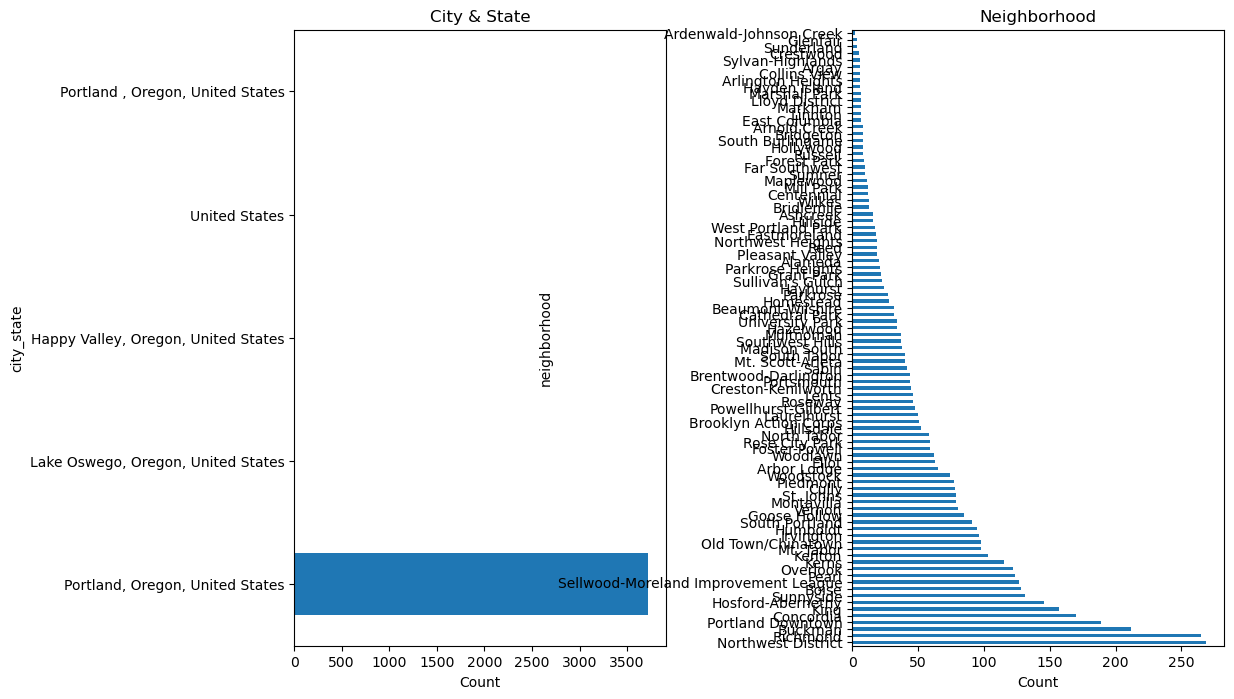

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
pdx['city_state'].value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('City & State')
ax[0].set_xlabel('Count')

pdx['neighborhood'].value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Neighborhood')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);

Well, found more data to clean. 

In [15]:
pdx['city_state'].replace({'Portland , Oregon, United States':'Portland, Oregon, United States'}, inplace=True)

In [16]:
pdx['city_state'].value_counts()

city_state
Portland, Oregon, United States        3725
Lake Oswego, Oregon, United States        4
Happy Valley, Oregon, United States       4
United States                             1
Name: count, dtype: int64

Non-Portland listings are minimal, drop them and then drop the column.

In [17]:
pdx = pdx[pdx['city_state'].str.contains("Portland, Oregon, United States")==True]

In [18]:
pdx['city_state'].value_counts()

city_state
Portland, Oregon, United States    3725
Name: count, dtype: int64

In [19]:
pdx.drop(columns=['city_state'], inplace=True)

In [20]:
print(len(pdx['neighborhood'].value_counts()))

92


In [21]:
top10_nbhd = pdx['neighborhood'].value_counts(ascending=False).head(10)

print(top10_nbhd)

neighborhood
Richmond                                205
Northwest District                      185
Buckman                                 183
Concordia                               135
Portland Downtown                       133
King                                    125
Hosford-Abernethy                       116
Sunnyside                               101
Overlook                                 98
Sellwood-Moreland Improvement League     93
Name: count, dtype: int64


In [22]:
bottom10_nbhd = pdx['neighborhood'].value_counts(ascending=True).head(10)

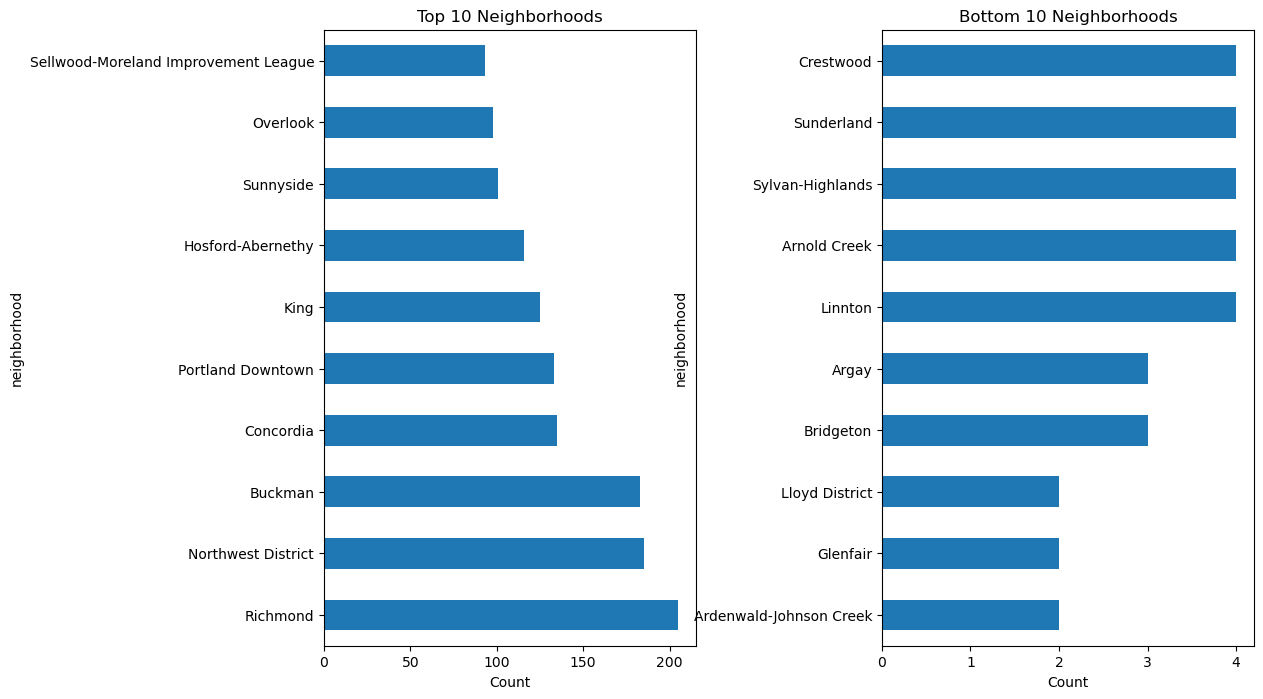

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
top10_nbhd.plot(kind='barh', ax=ax[0])
ax[0].set_title('Top 10 Neighborhoods')
ax[0].set_xlabel('Count')

bottom10_nbhd.plot(kind='barh', ax=ax[1])
ax[1].set_title('Bottom 10 Neighborhoods')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);

In [24]:
pdx['price'] = pdx['price'].str.replace('$','')
pdx['price'] = pdx['price'].str.replace(',','')

In [25]:
pdx['price'] = pdx['price'].astype(float)

In [26]:
neighborhood_price_means = pdx.groupby('neighborhood')['price'].mean()
neighborhood_price_means.head()

neighborhood
Alameda                    138.846154
Arbor Lodge                 96.739130
Ardenwald-Johnson Creek    116.000000
Argay                       38.500000
Arlington Heights          103.000000
Name: price, dtype: float64

Text(0.5, 0, 'Price')

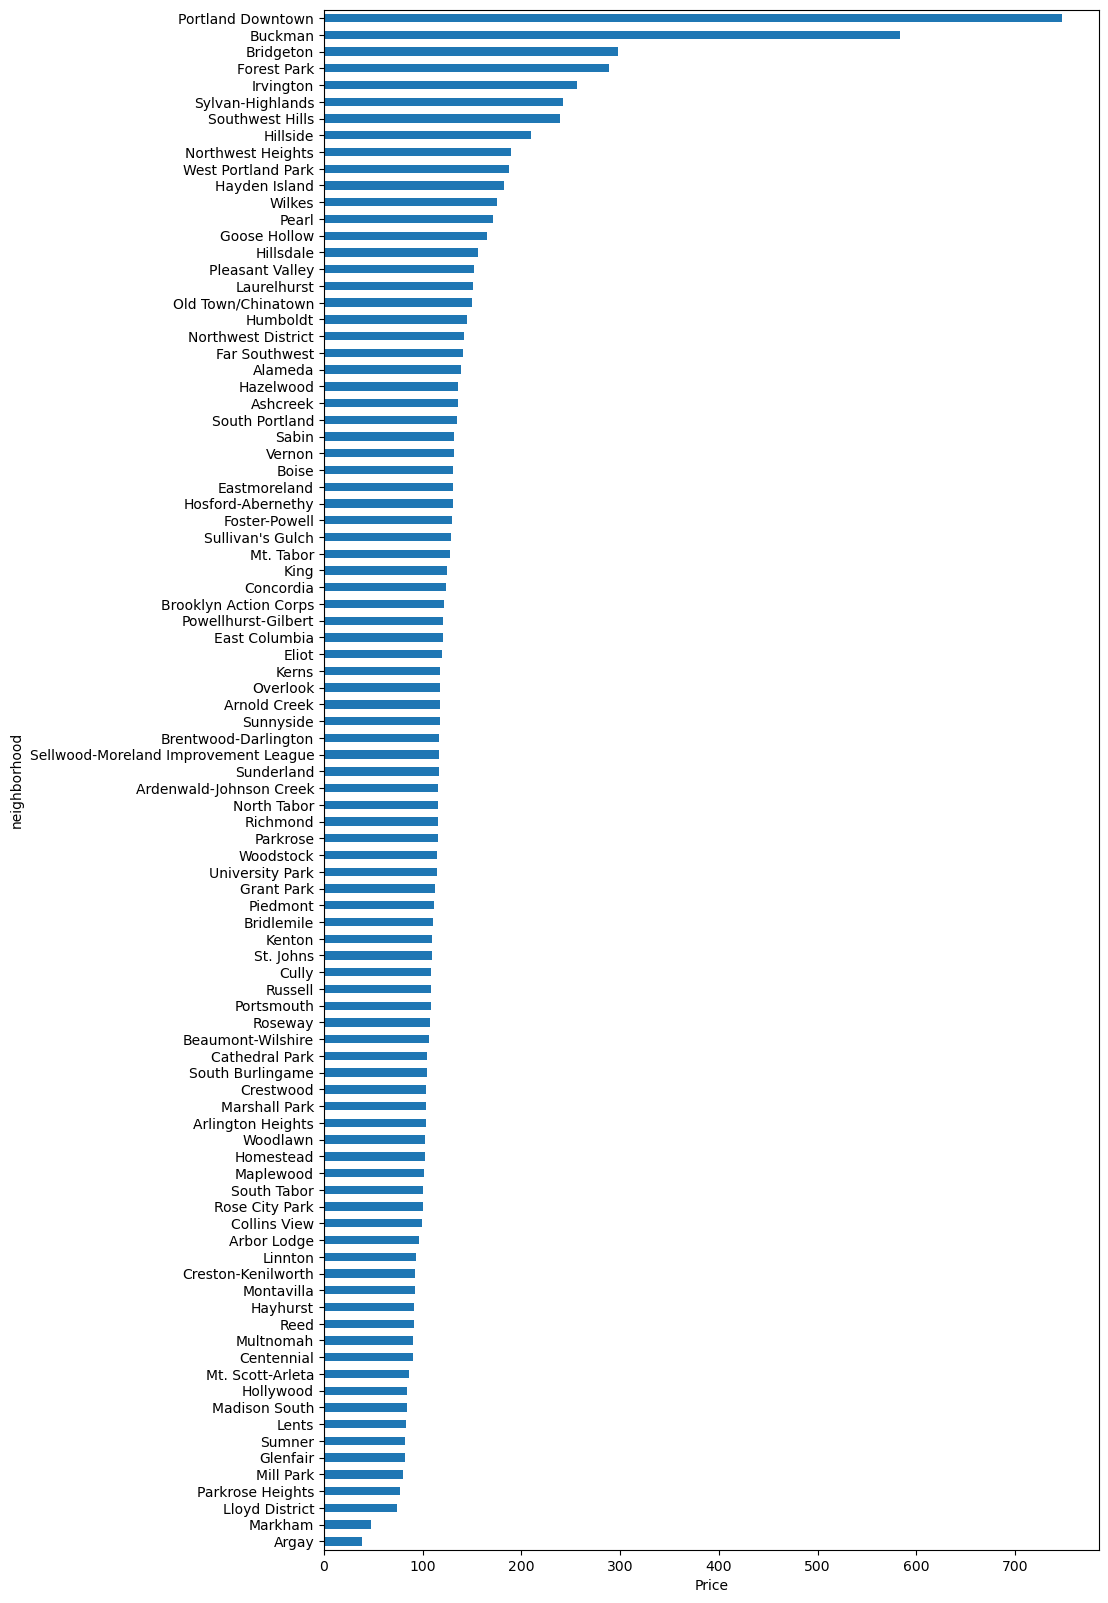

In [27]:
neighborhood_price_means.sort_values(ascending=True).plot(kind='barh', figsize=(10,20))
plt.xlabel('Price')

At this point, I'm interested enough in the neighborhood data to want to be able to look at it on its own.

In [28]:
neighborhood_summary = pdx.groupby('neighborhood').agg(
    NB_listings_count = pd.NamedAgg(column='name', aggfunc = 'size'),
    NB_price_mean = pd.NamedAgg(column = 'price', aggfunc = 'mean'),
    NB_review_location_mean = pd.NamedAgg(column = 'review_scores_location', aggfunc = 'mean'),
    NB_review_value_mean = pd.NamedAgg(column = 'review_scores_value', aggfunc = 'mean'),
    NB_avail_30_mean = pd.NamedAgg(column = 'availability_30', aggfunc = 'mean'),
    NB_avail_60_mean = pd.NamedAgg(column = 'availability_60', aggfunc = 'mean'),
    NB_avail_90_mean = pd.NamedAgg(column = 'availability_90', aggfunc = 'mean'),
    NB_avail_365_mean = pd.NamedAgg(column = 'availability_365', aggfunc = 'mean'),
    NB_min_nights_low = pd.NamedAgg(column = 'minimum_minimum_nights', aggfunc = 'min'),
    NB_min_nights_high = pd.NamedAgg(column = 'maximum_minimum_nights', aggfunc = 'max'),
    NB_max_nights_low = pd.NamedAgg(column = 'minimum_maximum_nights', aggfunc = 'min'),
    NB_max_nights_high = pd.NamedAgg(column = 'maximum_maximum_nights', aggfunc = 'max'),
    NB_total_reviews = pd.NamedAgg(column = 'number_of_reviews', aggfunc = 'sum'),
    NB_review_rating_mean = pd.NamedAgg(column = 'review_scores_rating', aggfunc = 'mean'),
    NB_review_accuracy_mean = pd.NamedAgg(column = 'review_scores_accuracy', aggfunc = 'mean'),
    NB_review_cleanliness_mean = pd.NamedAgg(column = 'review_scores_cleanliness', aggfunc = 'mean'),
    NB_review_checkin_mean = pd.NamedAgg(column = 'review_scores_checkin', aggfunc = 'mean'),
    NB_review_communication_mean = pd.NamedAgg(column = 'review_scores_communication', aggfunc = 'mean')
).reset_index()

In [29]:
neighborhood_summary.to_csv('neighborhood_summary.csv', index=False)  

Check out a few other features

In [30]:
bed_count_price_means = pdx.groupby('beds')['price'].mean()
bed_count_price_means.head()

beds
1.0    144.457975
2.0    145.906511
3.0    158.394667
4.0    293.650000
5.0    244.680000
Name: price, dtype: float64

Text(0.5, 0, 'Price')

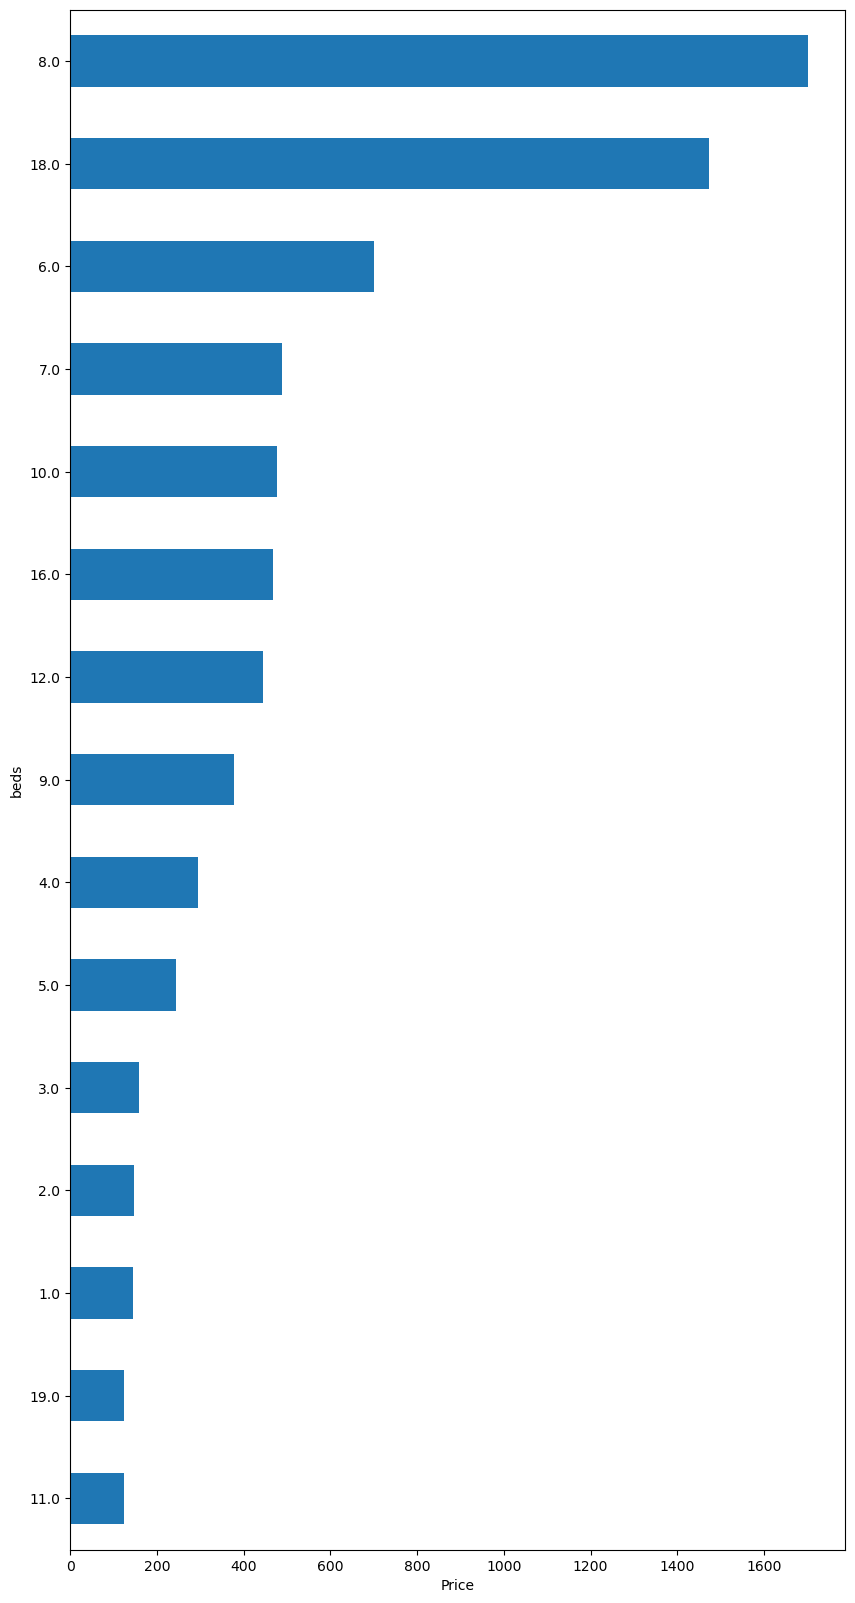

In [31]:
bed_count_price_means.sort_values(ascending=True).plot(kind='barh', figsize=(10,20))
plt.xlabel('Price')

A little suspicious of the 19/18/11 bed listings, but it's possible. <br><br>I wonder if beds or neighborhoods has a stronger impact on price?

In [32]:
pdx.groupby('host_is_superhost')['price'].mean()

host_is_superhost
f    260.326220
t    120.848951
Name: price, dtype: float64

Definitely seems to make a difference.

In [33]:
pdx['price'].isnull().sum()

257

Since Price is the target, these rows are no help. I'm OK with them being included in the neighborhood summary since there is no price information in there, but I don't want them in my main dataframe. 

In [34]:
pdx.dropna(subset = ['price'], inplace=True)

In [35]:
pdx.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3468.0,2.514951e+17,3.785422e+17,1.289900e+04,1.877461e+07,4.013053e+07,6.659586e+17,1.050119e+18
scrape_id,3468.0,2.023122e+13,0.000000e+00,2.023122e+13,2.023122e+13,2.023122e+13,2.023122e+13,2.023122e+13
description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,3468.0,1.101923e+08,1.458894e+08,1.618000e+03,8.007500e+06,3.757559e+07,1.625262e+08,5.475943e+08
host_listings_count,3468.0,1.328864e+02,5.456419e+02,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,4.829000e+03
host_total_listings_count,3468.0,3.563134e+02,1.614831e+03,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,8.868000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3468.0,4.552836e+01,3.303582e-02,4.543660e+01,4.550726e+01,4.552555e+01,4.555526e+01,4.561596e+01
longitude,3468.0,-1.226523e+02,4.463824e-02,-1.228329e+02,-1.226817e+02,-1.226529e+02,-1.226253e+02,-1.224836e+02
accommodates,3468.0,3.587082e+00,2.150436e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01


In [36]:
pdx_num_cleaned = pdx[['host_id','host_listings_count','host_total_listings_count','accommodates','beds','price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']]

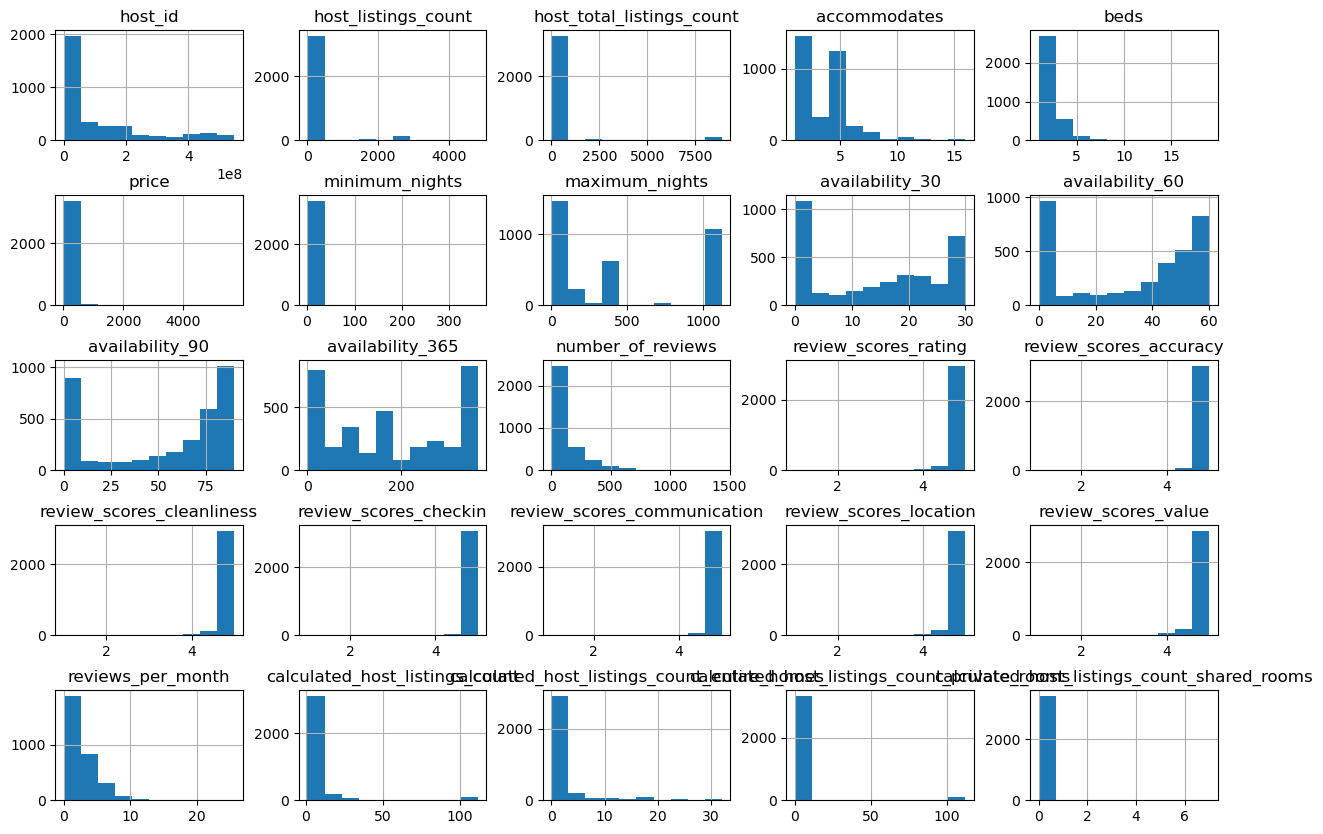

In [37]:
pdx_num_cleaned.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

Stinkeye: 
- Host listings count: max of 4000???
- Host total listings count - probably based on listings count
- Host ID - seems pretty useless
- price: max of 4,000? possible but want to double check
- Minimum and Maximum nights might be less helpful since they have some pretty big outliers.

In [38]:
pdx.shape

(3468, 74)

In [39]:
pdx.to_csv('pdx_cleaned.csv', index=False)  

The original shape of the data was 4945 rows, 75 columns. After cleaning we are down to 3468 rows and dropped 1 column. I may be too cautious with not wanting to drop rows or columns. The logic here is that this is an iterative process and I may need to go back. After looking at the various location data in the dataset I dropped all non-Portland City rows and then dropped the column with the city names. I renamed a few columns to make their contents clearer to me.<br><br>Overall, it looks like there are interesting correlations between listing price and neighborhood, some unsurprising correlations between number of beds and price, and possibly more correlations to explore between reviews and price. <br><br>While price is the target feature it is worth it to look at the availability numbers - while there may be prices that are "fair" based on other listings, are there prices that are more likely to turn listings into bookings?